#  Logistic Regression from scratch

###  Loading the data


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [4]:
#Logistic regression is a classification algorithm and tries to predict a discrete set of class labels to a given input. 

In [5]:
data = pd.read_csv("DMV_Written_Tests.csv")
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
#Column results has the binary labels: 0 is for those who failed the test, 1 is for those who passed. The goal is to learn from this info and predict the results given a pair of test results. 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [8]:
#Separating the features
scores = data[['DMV_Test_1', "DMV_Test_2"]].values
results = data ['Results'].values

### Task 3: Visualize the Data
---

In [9]:
#Creating column vectors : 
passed = (results == 1).reshape(100,1)
failed = (results == 0).reshape(100,1)

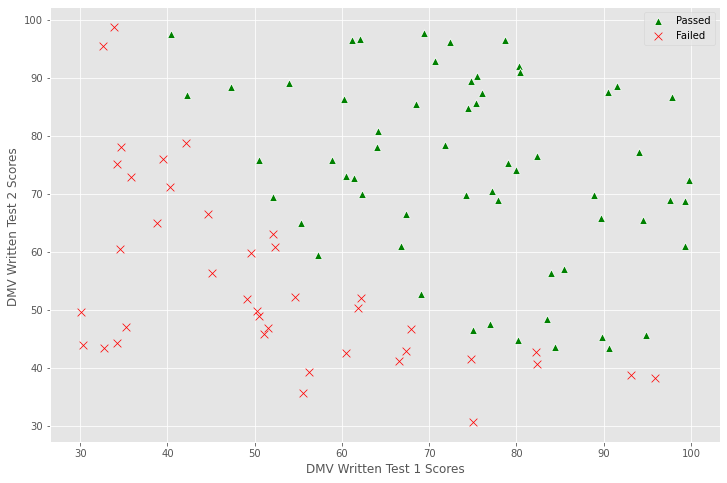

In [10]:
#Scatterplot of the 'passed' points
ax = sns.scatterplot(x= scores[passed[:, 0], 0], y = scores[passed[:, 0], 1], 
marker = "^", color= "green", s = 60)

#Scatterplot of the 'failed points
ax = sns.scatterplot(x= scores[failed[:, 0], 0], y = scores[failed[:, 0], 1], 
marker = "x", color= "red", s = 60)

ax.set(xlabel = "DMV Written Test 1 Scores", ylabel = "DMV Written Test 2 Scores ")
ax.legend(['Passed', 'Failed'])
plt.show()

In [11]:
#The logistic regression algorithm will define a line which will separate the points into passed and failed in the graph. This will be a decision boundary. A function that defines it very will is the logistic sigmoid function. 

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [12]:
#The maximum uncertainty in this function happens when a value zero is input. This happens because it will estimate that a point has 50% of chance to be on either side. This is the maximum uncertainty. 

In [13]:
def logistic_function (x):
    return 1/(1+ np.exp(-x))

In [14]:
logistic_function(0)

0.5

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [15]:
#Objective is to minimize J(theta). m is the number of samples we are training on. 
# H0(x) is the logistic function given the input . It will be the predicted value from our model (below, y_pred)
#Using numpy function dot 
#In the gradient formula xj means x transpose 

In [16]:
def compute_cost (theta, x, y):
    m = len(y)
    #Y_pred = h0(x(i))-  Defining h0(x(i)):
    y_pred = logistic_function(np.dot(x,theta) )
    #Term inside the sum operator:
    error = (y*np.log(y_pred)) + (1-y)*np.log(1-y_pred)

    #Defining cost - J0
    cost = - 1/m*sum(error)

    #Defining the gradient
    gradient = 1/m * np.dot(x.transpose(), (y_pred - y))

    return cost[0], gradient

### Task 6: Cost and Gradient at Initialization
---

In [17]:
#Best practice before testing the model using mean and standard deviation calculations

In [18]:
mean_scores = np.mean(scores, axis= 0)
std_scores = np.std(scores, axis=0)

#Standardization - zeroing the mean and standardizing the data
scores = (scores - mean_scores) / std_scores


In [19]:
mean_scores = np.mean(scores, axis= 0)
std_scores = np.std(scores, axis=0)

#Standardization - zeroing the mean and standardizing the data
scores = (scores - mean_scores) / std_scores
#Putting results in y and variables in x 
rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows,1)),scores, axis=1)

y = results.reshape(rows, 1) 

theta_init = np.zeros((cols+1, 1))
cost , gradient = compute_cost(theta_init, X, y)
print("Cost at initialization ", cost)
print("Gradients at initialization ", gradient)

Cost at initialization  0.693147180559946
Gradients at initialization  [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [20]:
#The result above is the cost and gradient without any optimization

### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [21]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs .append(cost)
    return theta, costs

In [22]:
theta, costs = gradient_descent(X, y, theta_init, 1, 200)

In [23]:
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1] )

Theta after running gradient descent: [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting cost: 0.2048938203512014


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, &#39;Values of Cost Function over Iterations of Gradient Descent&#39;)

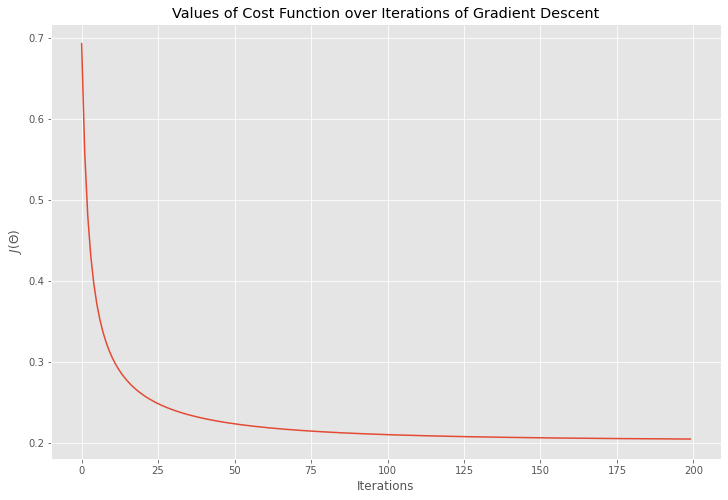

In [155]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over Iterations of Gradient Descent")

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

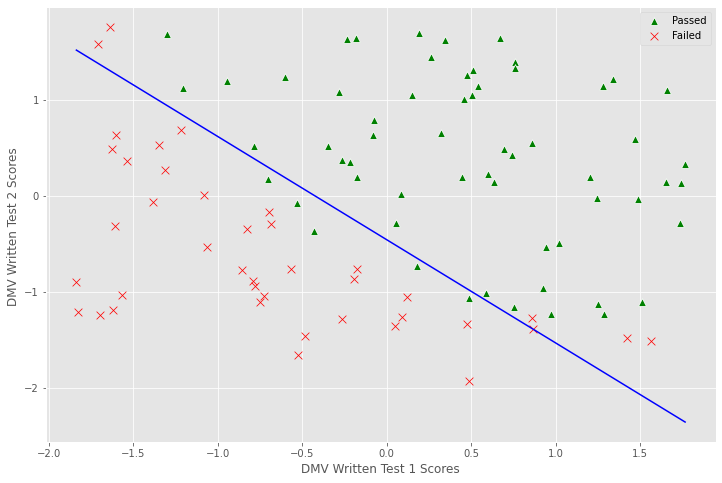

In [156]:
#Columns changes to 1 and 2 as compared to the previous graph
ax = sns.scatterplot(x= X[passed[:, 0], 1], y = X[passed[:, 0], 2], 
marker = "^", color= "green", s = 60)

ax = sns.scatterplot(x= X[failed[:, 0], 1], y = X[failed[:, 0], 2], 
marker = "x", color= "red", s = 60)

ax.set(xlabel = "DMV Written Test 1 Scores", ylabel = "DMV Written Test 2 Scores ")
ax.legend(['Passed', 'Failed'])

#Plotting the decision boundary, theta1, intercept, theta2 and 3 are the multiplers 
x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1]*x_boundary)/ theta[2]
sns.lineplot(x=x_boundary, y=y_boundary, color = "blue")
plt.show()

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [157]:
def predict(theta, x):
    results = logistic_function(x.dot(theta))
    return results > 0

In [158]:
p = predict(theta, X)
print("Training Accuracy:", sum(p==y)[0],"%")

Training Accuracy: 60 %


In [159]:
# p==y, we are matching the predicted values with the real values, y to see the percentage of success
#[0] is to return the highest value, followed by the % signal 

In [160]:
#Now using the trained model to actually predict data

In [163]:
test = np.array([50, 79])
test = (test - mean_scores)/ std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(theta))
print("A person who scores 50 and 79 on their DMV written tests have a", np.round(probability[0], 2), "probability of passing")

A person who scores 50 and 79 on their DMV written tests have a 1.0 probability of passing
